In [29]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
import scipy
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [30]:
# create training data
Xtrain = np.array([-4, -3, -2, -1.22, 1]).reshape(5,1)
noise = 0.2
ytrain = np.sin(Xtrain)  # + np.random.normal(0, noise, size(5,1))
n_t = len(Xtrain)

In [31]:
# "test" data (what we want to estimate/interpolate)
n_s= 50
Xtest = np.linspace(-5,5,n_s).reshape(-1,1)

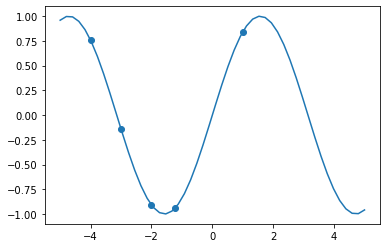

In [32]:
plt.scatter(Xtrain, ytrain)
plt.plot(Xtest, np.sin(Xtest))

### Kernel definition
##  $ k\left( x,x^{\prime} \right) =\sigma^{2} \text{exp} \left( -\frac{\| x-x^{\prime}\|^{2}}{2l^{2}} \right)$

 where 
 * $\sigma^2$ is the variance ($\sigma$ also known as amplitude)
 * $l$ is the lengthscale


In [33]:
def kernel(a,b,l=1, sigma=1):
    distance = sklearn.metrics.pairwise_distances(a,b)
    return sigma*np.exp(-1/(2*l**2)*distance**2)


### Prior

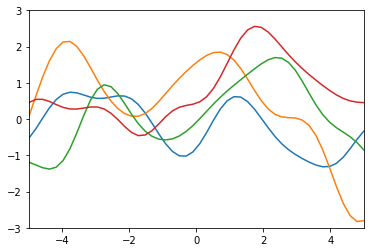

In [34]:
K_ss= kernel(Xtest, Xtest)

n_f = 4 # number of sampled functions
f_prior = np.random.multivariate_normal(mean=np.zeros(n_s), cov=K_ss, size=n_f).T

# plot sampled functions
plt.plot(Xtest, f_prior)
plt.axis([-5, 5, -3, 3])
plt.show()



### Posterior

In [35]:
# apply kernel function to training points
K= kernel(Xtrain, Xtrain)
noise= 0
K_inv= np.linalg.inv(K + noise*np.eye(n_t))

# apply to mutual
K_s= kernel(Xtrain, Xtest)

# compute mean function
mu= K_s.T@ytrain.squeeze()

# form covariance matrix
cov= K_ss-K_s.T@K_inv@K_s
stdv= np.sqrt(np.diag(cov)).squeeze()

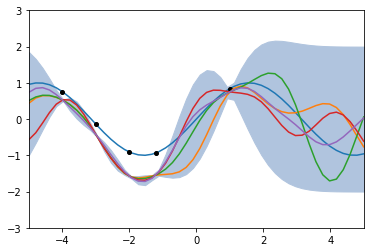

In [44]:
# get posterior samples
n_p= 4
f_post= np.random.multivariate_normal(mean=mu, cov=cov, size=n_p).T

plt.plot(Xtest, np.sin(Xtest))
plt.plot(Xtrain, ytrain, 'k.'
         , ms=8)
plt.plot(Xtest, f_post)
plt.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color='lightsteelblue')
plt.axis([-5, 5, -3, 3])
plt.show()

In [ ]:
]